# A. Предсказание движения беспилотного автомобиля

Когда в XIX веке на улицах Великобритании появились первые самоходные повозки, они вызвали у людей скорее страх и недоверие, чем восторг. Поэтому в 1865 году в Великобритании был принят The Locomotive Act, более известный как Red Flag Act, который требовал, чтобы перед каждым автомобилем шёл человек с красным флажком или фонарём. Этот «предвестник прогресса» должен был предупреждать пешеходов и конные экипажи о приближении нового механического транспорта.

Кроме того, закон строго ограничивал скорость автомобилей: не более 2 миль в час в городах и 4 миль в час за их пределами. Эти меры были направлены на то, чтобы адаптировать общество к новым транспортным средствам и минимизировать их риски для безопасности. К концу XIX века стало очевидно, что подобные ограничения только сдерживают прогресс, и в 1896 году Red Flag Act был отменён, а автомобили получили право двигаться быстрее и без «предвестника», предсказывающего появление автомобиля.

Сегодня предсказание маршрута автомобиля стало делом не человека с флажком, а искусственного интеллекта. ИИ способен опираться на огромное количество данных — от состояния дорог и трафика до погодных условий и угла поворота колёс — чтобы не просто направить автомобиль, а выбрать для него наилучший маршрут.

Ваша задача — обучить модель, позволяющую точно моделировать траекторию движения автомобиля на основе поступающих команд управления, технических характеристик и исторических данных о прошлых проездах транспорта по различным дорогам.


**Обучающий и тестовый датасеты выложены на** https://disk.yandex.ru/d/7Sa-kGT2k54anA



## Данные для обучения
Архив YaCupTrain.tar содержит набор из N train записанных сцен проезда легкового автомобиля, разложенных по отдельным папкам. Каждая папка содержит 3 файла:

- metadata.json: содержит общую информацию про сцену
- ride_date — дата проезда
- vehicle_id — уникальный идентификатор автомобиля
- vehicle_model — идентификатор модели автомобиля
- vehicle_model_modification — идентификатор модификации указанной модели автомобиля
- tires — идентификатор типа шин, используемых для колёс передней (front) и задней (rear) оси автомобиля
- location_reference_point_id — идентификатор референсной точки, используемой в качестве начала отсчёта координат в файле localization.csv
- localization.csv: описывает траекторию движения автомобиля на данной 60-секундной сцене. Представляет собой csv файл, каждая строчка которого имеет формат
stamp_ns — время в наносекундах от начала сцены
x, y, z — координаты центра задней оси автомобиля. Считаются в метрах от указанной референсной точки сцены. Направления осей относительно референсной точки: 
x - на восток, 
y - на север, 
z - в небо
roll, pitch, yaw — углы Эйлера в радианах, описывающие ориентацию автомобиля в пространстве. Угол yaw считается относительно оси 
x в направлении оси y.
- control.csv: описывает последовательность команд управления, отправленных автомобилю на протяжении данной сцены.
- stamp_ns — время в наносекундах от начала сцены
- acceleration_level — желаемая интенсивность ускорения. Положительные значения соответствуют силе нажатия на педаль газа, отрицательные — силе нажатия на педаль тормоза
- steering — желаемый угол поворота руля в градусах относительно центрального положения
Обратите внимание, что диапазон значений acceleration_level зависит от модели автомобиля. Также, важно отметить, что данные команды описывают желаемое целевое состояние элементов управления в указанный момент времени, и не обязательно исполняются мгновенно.

## Данные для тестирования
Архив YaCupTest.tar содержит набор из N test    сцен, для которых требуется предсказать новую траекторию автомобиля на основе начального состояния и поступающих команд управления. Каждая папка с тестовым сценарием содержит 4 файла:

- metadata.json: содержит общую информацию про сцену аналогично обучающим данным
- localization.csv: описывает траекторию движения автомобиля в течении первых 5 секунд сцены. Формат аналогичен обучающим данным.
- control.csv: описывает последовательность команд управления в течении первых 20 секунд сцены. Формат аналогичен обучающим данным.
- requested_stamps.csv: содержит одну колонку stamp_ns, содержащую список из T n  моментов времени от начала сцены (в наносекундах) в интервале с 5 по 20 секунду, для которых требуется предсказать положение автомобиля.

## Формат вывода
В качестве решения вам необходимо отправить один файл в формате *.csv, содержащий следующие 5 колонок:

- testcase_id — номер сцены из тестового набора (имя папки от 0 до N test −1)
- stamp_ns — моменты времени из соответствующего файла requested_stamps.csv тестовой сцены.
- x, y, yaw — 3 колонки с предсказанными координатами положения машины и её ориентации на плоскости в указанные моменты времени (В формате аналогичном входным данным).
Таким образом, общее количество строк с предсказаниями в файле с ответом должно совпадать с суммарным количеством таймстемпов в файлах requested_stamps.csv.

- x, y, yaw target

## Calculate metric

Let's describe final metric. As a first step, all predicted triples $(x,y,yaw)$ are being converted into 2 points $[(x_1, y_1), (x_2, y_2)]$ in the following way:
$$
(x_1, y_1) = (x, y), \\
(x_2, y_2) = (x_1, y_1) + S \times (yaw_x, yaw_y)
$$  

where $S = 1$. In other words, we build a directed segment of length $1$. These points then used in the metric calculation.


Metric for a single pose (rmse):

$$
pose\_metric = \sqrt{ \frac{\displaystyle\sum_{j=1}^{k} {(x_j-\hat{x_j})^2 + (y_j-\hat{y_j})^2}}{k} }
$$

where $k$ - number of points that describe single pose (in our case $k=2$).

Metric for a testcase:

$$
testcase\_metric = \frac{1}{n}  \displaystyle\sum_{i=1}^{n}pose\_metric_i
$$

where $n$ - number of localization points to predict.

And, final metric for a whole dataset:

$$
dataset\_metric = \frac{1}{n}  \displaystyle\sum_{i=1}^{n}testcase\_metric_i
$$

where $n$ - number of test cases.


## Import libraries

In [1]:
import json
import pandas as pd
import os
import sklearn
import datetime
import numpy as np

from pprint import pprint

import clickhouse_connect

from pydantic import BaseModel, Field
from typing import List, Dict, Any, Optional

# eda

import phik


# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# time
from time import sleep
from datetime import datetime as dt
import pytz

# ml
import xgboost as xgb
import catboost as ctb

import optuna
from optuna.visualization.matplotlib import plot_param_importances

import mlflow


# mlflow.set_experiment('price_meas23_pred')

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline as skl_pipeline

from sklearn.base import BaseEstimator, TransformerMixin

# from imblearn.pipeline import Pipeline as imb_pipeline
# from imblearn.over_sampling import SMOTE

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, PowerTransformer, OrdinalEncoder, StandardScaler, RobustScaler

sklearn.set_config(transform_output='pandas')

# load metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# turn off warnings
import warnings
warnings.filterwarnings('ignore')

from dotenv import load_dotenv
load_dotenv()

# set all columns to be displayed
pd.set_option('display.max_columns', None)

# import tools

from tools import pd_tools
from tools import spark_tools
from tools.create_db_table_from_df import sql_create_table_from_pd


root_path = "."
tmp_path = f'{root_path}/tmp'
data_path = f'{root_path}/data/self-drive'
train_data_path = f'{data_path}/train_data'
test_data_path = f'{data_path}/test_data'
tmp_data_path=f'{data_path}/tmp_data'

# constants
CH_USER = os.getenv("CH_USER")
CH_PASS = os.getenv("CH_PASS")
CH_IP = os.getenv('CH_IP')
RAND_ST = 354
# MLFLOW_TRACKING_URI = os.getenv('MLFLOW_TRACKING_URI')

your_mlflow_tracking_uri = f'{root_path}/mlruns' # for docker mlflow server
# your_mlflow_tracking_uri = "http://127.0.0.1:5000" # for local mlflow server
# your_mlflow_tracking_uri = MLFLOW_TRACKING_URI # for remote mlflow server
mlflow.set_tracking_uri(your_mlflow_tracking_uri)


ch_client = clickhouse_connect.get_client(host=CH_IP, port=8123, username=CH_USER, password=CH_PASS)


/usr/local/lib/python3.8/dist-packages/xgboost/core.py:265: FutureWarning: Your system has an old version of glibc (< 2.28). We will stop supporting Linux distros with glibc older than 2.28 after **May 31, 2025**. Please upgrade to a recent Linux distro (with glibc 2.28+) to use future versions of XGBoost.
Note: You have installed the 'manylinux2014' variant of XGBoost. Certain features such as GPU algorithms or federated learning are not available. To use these features, please upgrade to a recent Linux distro with glibc 2.28+, and install the 'manylinux_2_28' variant.
  warnings.warn(


## Data load

In [22]:
# read folder names in path
def read_names(path: str):
    '''Read folder names or file names in the path'''
    return os.listdir(path)

train_ids = pd.Series(read_names(train_data_path)).apply(int).sort_values().reset_index(drop=True)
train_ids



0            0
1            1
2            2
3            3
4            4
         ...  
41995    41995
41996    41996
41997    41997
41998    41998
41999    41999
Length: 42000, dtype: int64

### Create functions for load data

In [66]:
def make_df_id(control:pd.DataFrame, localization:pd.DataFrame, metadata:pd.DataFrame) -> pd.DataFrame:
    '''Make a model dataframe from control, localization and metadata dataframes for a single id'''

    def find_min_max(control:pd.DataFrame, localization:pd.DataFrame):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        control['loclz_stamp_ns_max'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] >= x]['stamp_ns'].min())
        control['loclz_stamp_ns_min'] = control['stamp_ns'].apply(lambda x: localization[localization['stamp_ns'] < x]['stamp_ns'].max())
        control_2m = control.copy()
        control_2m.rename(columns={'stamp_ns':'ctrl_stamp_ns'}, inplace=True)
        return control_2m

    def merge_min_max(control_2m:pd.DataFrame, localization:pd.DataFrame):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        control_3m = (control_2m.merge(localization, left_on='loclz_stamp_ns_max', right_on='stamp_ns', how='left', suffixes=('', '_max'))
                    .merge(localization, left_on='loclz_stamp_ns_min', right_on='stamp_ns', how='left', suffixes=('', '_min'))
        )
        control_3m.rename(columns={'x':'x_max'
                                ,'y':'y_max'
                                ,'z':'z_max'
                                ,'roll':'roll_max'
                                ,'pitch':'pitch_max'
                                ,'yaw':'yaw_max'
                                ,'stamp_ns':'stamp_ns_max'
                    }, inplace=True)
        control_3m.drop(columns=['loclz_stamp_ns_max', 'loclz_stamp_ns_min'], inplace=True)
        return control_3m

    def interpolate_coords(control_3m, col_min:str, col_max:str):
        '''Interpolate values between max and min values'''
        control_interpolated = (control_3m[['ctrl_stamp_ns', 'stamp_ns_max', 'stamp_ns_min', col_min, col_max]]
                    .apply(lambda x: (x['ctrl_stamp_ns'] - x['stamp_ns_min']) / (x['stamp_ns_max'] - x['stamp_ns_min']) * (x[col_max] - x[col_min]) + x[col_min], axis=1)
                    )
        return control_interpolated

    def tires_to_columns_date(metadata:pd.DataFrame):
        '''Change tires column to front and rear columns and 
        convert ride_date to datetime and add year, month, day columns'''
        metadata['front_tire'] = metadata['tires'][0]
        metadata['rear_tire'] = metadata['tires'][1]
        metadata = metadata.drop(columns=['tires']).reset_index(drop=True).loc[:0]
        # convert ride_date to datetime and add year, month, day columns
        metadata['ride_date'] = pd.to_datetime(metadata['ride_date'])
        metadata['ride_year'] = metadata['ride_date'].dt.year
        metadata['ride_month'] = metadata['ride_date'].dt.month
        metadata['ride_day'] = metadata['ride_date'].dt.day
        metadata = metadata.drop(columns=['ride_date'])
        
        return metadata

    def add_metadata(control:pd.DataFrame, metadata:pd.DataFrame):
        '''Add metada to each row in control dataframe'''
        # Make a copy to avoid SettingWithCopyWarning
        control_model = control.copy()
        for col in metadata.columns:
            control_model[col] = metadata.loc[0, col]  # Set the entire column in the copy
        
        return control_model

    # find min and max timestamp in localization for each timestamp in control dataframe
    control_2m = find_min_max(control, localization)
    # merge min and max timestamp in localization for each timestamp in control dataframe
    control_3m = merge_min_max(control_2m, localization)
    
    
    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    contr_cols = ['ctrl_stamp_ns', 'acceleration_level', 'steering']

    # interpolate values between max and min values
    for col in coords_cols:
        control_3m[col] = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')

    # select coords and control columns
    control_interpolated = control_3m[contr_cols + coords_cols]
   
    # change tires column to front and rear columns and convert ride_date to datetime and add year, month, day columns
    metadata_m = tires_to_columns_date(metadata)
 
    clm = add_metadata(control_interpolated, metadata_m)

    # add acceleration_level and steering columns with shifts
    for col in ['acceleration_level', 'steering']:
        for i in range(1, 4):
            clm[f'{col}_shift_{i}'] = clm[col].shift(i)

    # add x, y, yaw columns with shifts
    for col in ['x', 'y', 'yaw']:
        for i in range(1, 4):
            clm[f'{col}_shift_{i}'] = clm[col].shift(i)

    # add mean last 10 values for acceleration_level and steering columns
    for col in ['acceleration_level', 'steering']:
        clm[f'{col}_last_10_mean'] = clm[col].rolling(window=10).mean()

    # add mean last 10 values for x, y, yaw columns
    for col in ['x', 'y', 'yaw']:
        clm[f'{col}_last_10_mean'] = clm[col].rolling(window=10).mean()

    return clm


In [67]:
# read data in each file with spark
def make_df_all_ids(path: str, ids: pd.Series, files: list) -> pd.DataFrame:
    '''Read data in each file with spark'''
    data = []
    for i in ids:
        for file in files:
            if file == 'control.csv':
                control = pd.read_csv(f'{path}/{i}/{file}')
            elif file == 'localization.csv':
                localization = pd.read_csv(f'{path}/{i}/{file}')
            elif file == 'metadata.json':
                metadata = pd.read_json(f'{path}/{i}/{file}')

        clm = make_df_id(control, localization, metadata)
        
        data.append(clm)
    
    # Concatenate all DataFrames from the list
    data_clm = pd.concat(data, ignore_index=True)
     
    return data_clm

In [68]:
ids = train_ids[:20]
files = ['control.csv', 'localization.csv', 'metadata.json']
train_data_clm = make_df_all_ids(train_data_path, ids, files)
train_data_clm.head()

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
0,2987440736,-114,-2.655140,-4305.325027,-14560.800637,67.786293,0.002836,-0.048921,-1.945764,0,0,0,0,0,0,2022,3,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3027341070,-123,-2.598169,-4305.489155,-14561.217631,67.808224,0.002993,-0.049162,-1.945839,0,0,0,0,0,0,2022,3,14,-114.0,NaN,NaN,-2.655140,NaN,NaN,-4305.325027,NaN,NaN,-14560.800637,NaN,NaN,-1.945764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3066793076,-132,-2.544422,-4305.652097,-14561.630123,67.833736,0.005068,-0.049696,-1.945933,0,0,0,0,0,0,2022,3,14,-123.0,-114.0,NaN,-2.598169,-2.655140,NaN,-4305.489155,-4305.325027,NaN,-14561.217631,-14560.800637,NaN,-1.945839,-1.945764,NaN,NaN,NaN,NaN,NaN,NaN
3,3106757146,-141,-2.544422,-4305.815555,-14562.044470,67.857731,0.006305,-0.050110,-1.946037,0,0,0,0,0,0,2022,3,14,-132.0,-123.0,-114.0,-2.544422,-2.598169,-2.655140,-4305.652097,-4305.489155,-4305.325027,-14561.630123,-14561.217631,-14560.800637,-1.945933,-1.945839,-1.945764,NaN,NaN,NaN,NaN,NaN
4,3146784622,-147,-2.488557,-4305.979063,-14562.457108,67.880212,0.007713,-0.049996,-1.946176,0,0,0,0,0,0,2022,3,14,-141.0,-132.0,-123.0,-2.544422,-2.544422,-2.598169,-4305.815555,-4305.652097,-4305.489155,-14562.044470,-14561.630123,-14561.217631,-1.946037,-1.945933,-1.945839,NaN,NaN,NaN,NaN,NaN


In [69]:
train_data_clm.to_parquet(f'{tmp_data_path}/train_self_dr_trnsfmed.parquet', index=False)



## EDA

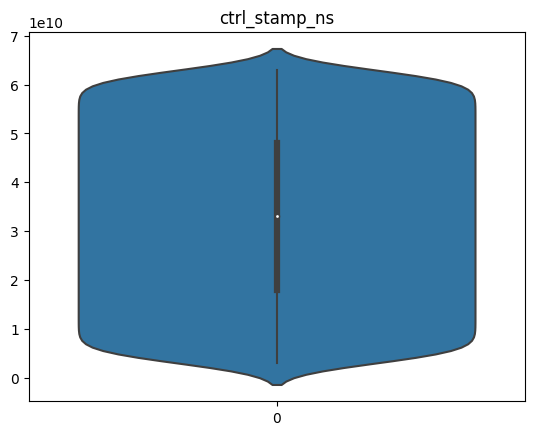

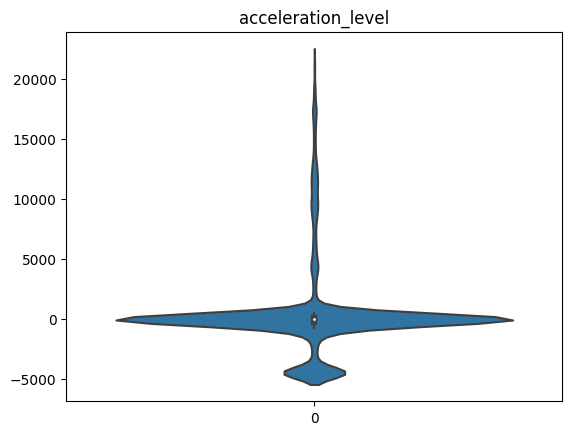

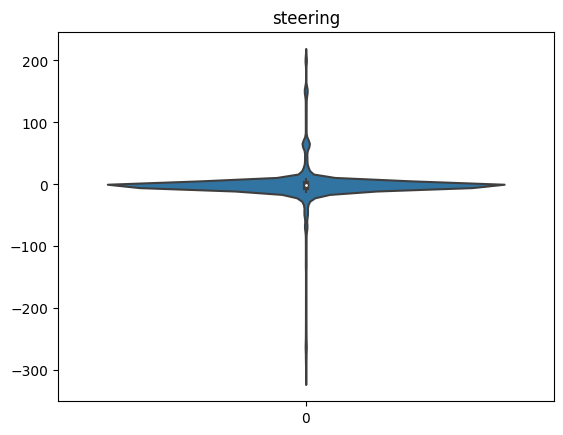

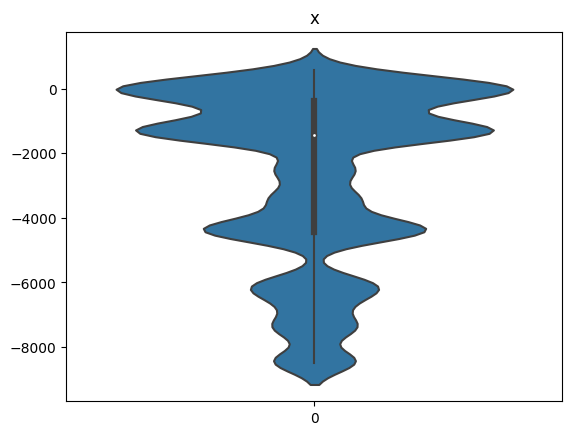

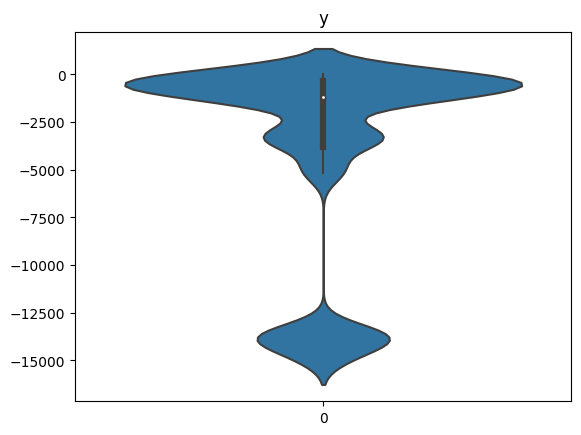

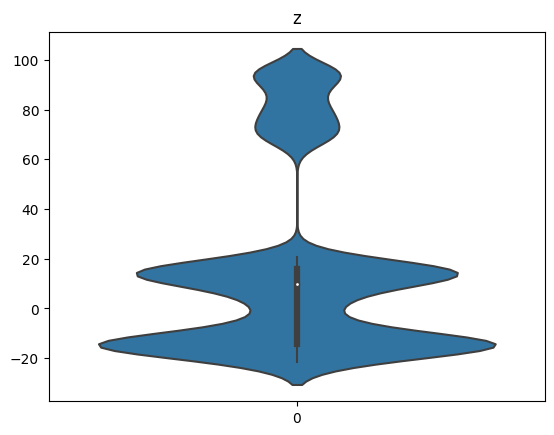

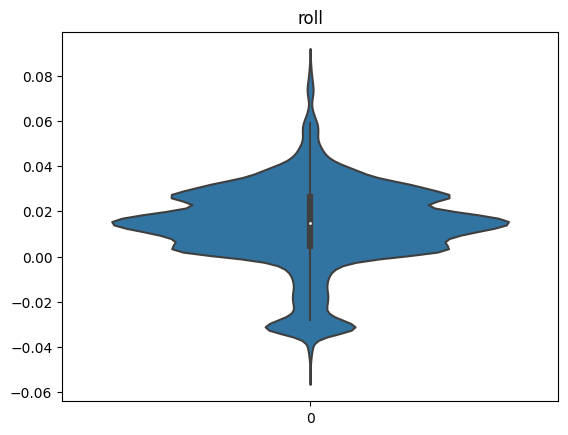

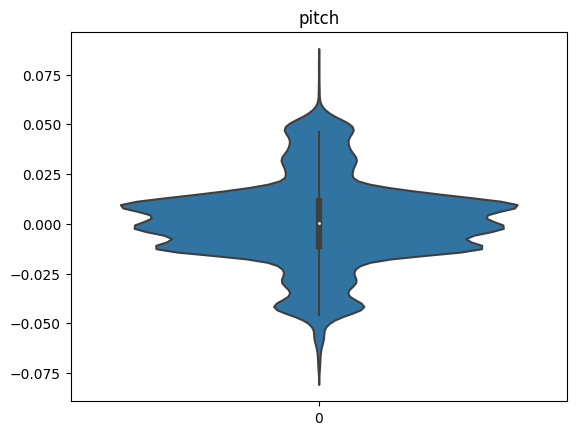

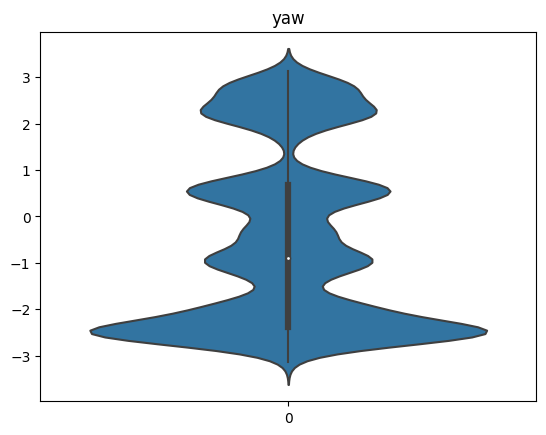

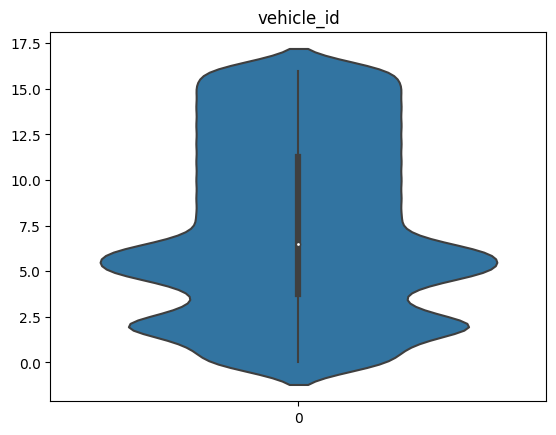

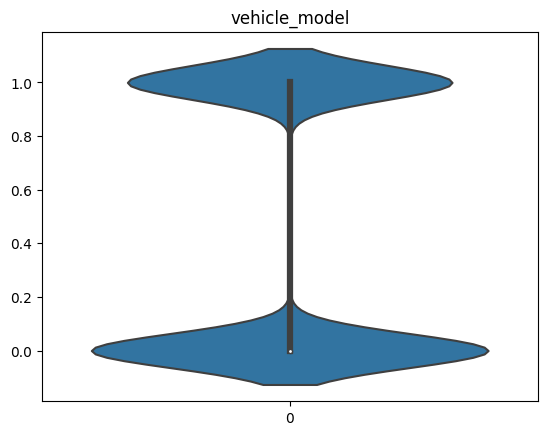

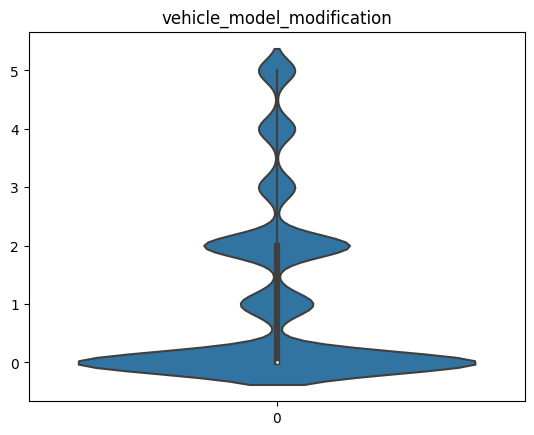

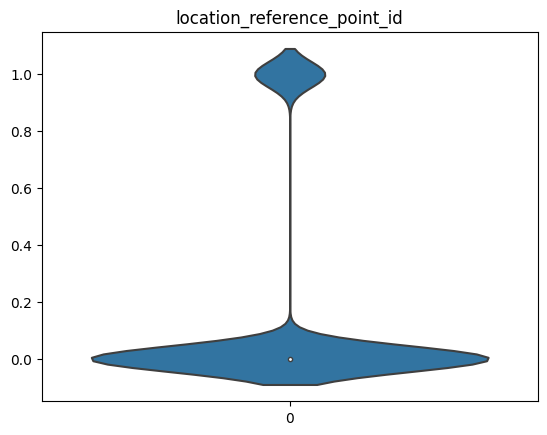

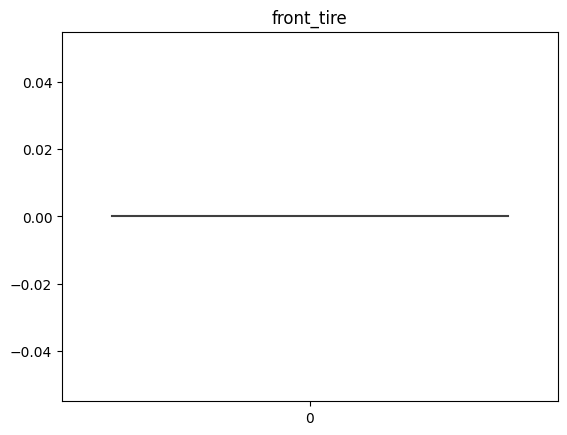

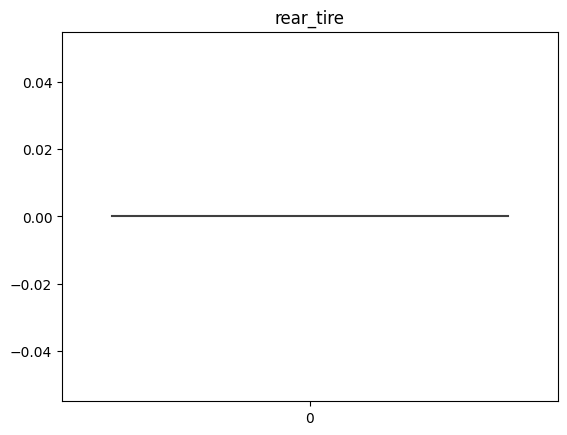

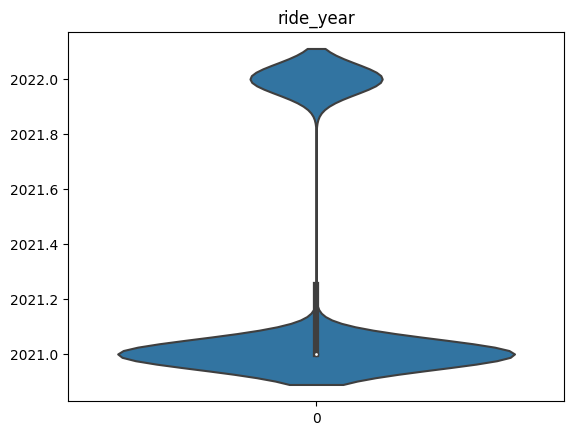

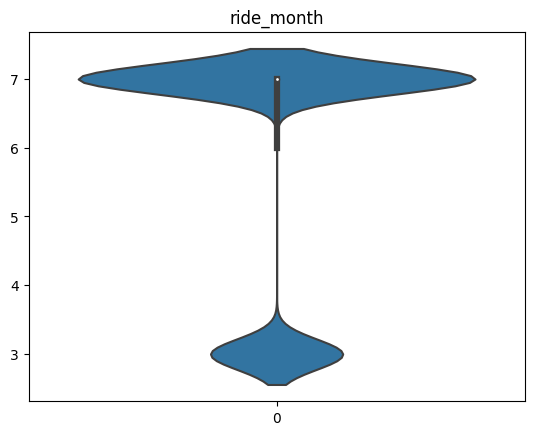

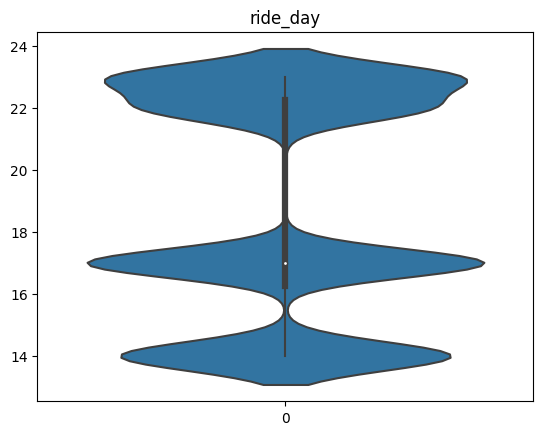

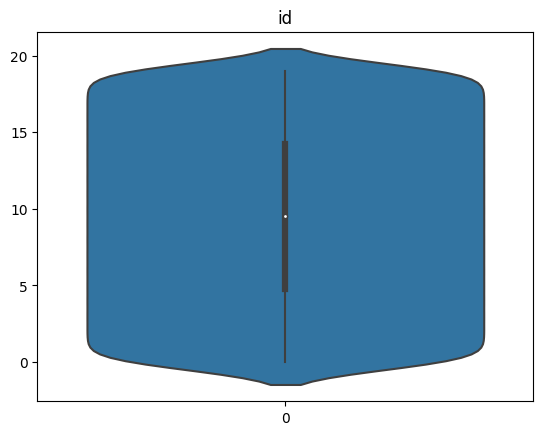

In [ ]:
for col in train_data_clm.columns:
    # show only original columns
    if 'shift' not in col and 'last' not in col:
        sns.violinplot(data=data_clm[col])
        plt.title(col)
        plt.show()


## Train test split

In [ ]:
train_data_clm = pd.read_parquet(f'{tmp_data_path}/train_self_dr_trnsfmed.parquet')

In [ ]:
train_data_clm.columns

Index(['ctrl_stamp_ns', 'acceleration_level', 'steering', 'x', 'y', 'z',
       'roll', 'pitch', 'yaw', 'vehicle_id', 'vehicle_model',
       'vehicle_model_modification', 'location_reference_point_id',
       'front_tire', 'rear_tire', 'ride_year', 'ride_month', 'ride_day', 'id',
       'acceleration_level_shift_1', 'acceleration_level_shift_2',
       'acceleration_level_shift_3', 'steering_shift_1', 'steering_shift_2',
       'steering_shift_3', 'x_shift_1', 'x_shift_2', 'x_shift_3', 'y_shift_1',
       'y_shift_2', 'y_shift_3', 'yaw_shift_1', 'yaw_shift_2', 'yaw_shift_3',
       'acceleration_level_last_10_mean', 'steering_last_10_mean',
       'x_last_10_mean', 'y_last_10_mean', 'yaw_last_10_mean'],
      dtype='object')

In [ ]:
train_data, test_data = train_test_split(train_data_clm, test_size=0.2, random_state=RAND_ST)
not_target_not_feature = ['z', 'roll', 'pitch']
targets = ['x', 'y', 'yaw']

train_features = train_data.drop(columns=[*not_target_not_feature, *targets])
test_features = test_data.drop(columns=[*not_target_not_feature, *targets])

## Make pipeline for each target

In [12]:
def pipeline_catboost(train_features:pd.DataFrame, test_features:pd.DataFrame, target:str):
    '''Create a pipeline for catboost model'''
    # check cols
    if set(train_features.columns) != set(test_features.columns):
        print(f'Cols are not equal in datasets: {set(train_features.columns) - set(test_features.columns)}')
        return None
    else:
        cols_checked = train_features.columns

    # set features cols

    # find numerical columns
    control_cols = ['ctrl_stamp_ns', 'acceleration_level','steering']

    shift_target_cols = [col for col in cols_checked if f'{target}_shift' in col]
    last_10_target_cols = [col for col in cols_checked if f'{target}_last_10' in col]
    num_cols = [col for col in cols_checked if col in control_cols] + shift_target_cols + last_10_target_cols

    # find categorical columns
    # find temp columns with numeric values for all targets
    cols_temp = [col for col in cols_checked if col in control_cols or 'last' in col or 'shift' in col]
    # delete num_cols from list of all columns and set cat_cols
    cat_cols = list(set(train_features.columns) - set(cols_temp))

    cols_for_model = num_cols + cat_cols

    train_features_for_model = train_features[cols_for_model]
    test_features_for_model = test_features[cols_for_model]


    # preprocessor

    # create transformers
    num_transformer = skl_pipeline(
        steps=[
            ('power', PowerTransformer())
        ]
    )

    # make preprocessor
    preprocessor = ColumnTransformer(
        remainder='passthrough',
        transformers=[
            ('num_transformer', num_transformer, num_cols)
        ]
    )

    # Preprocess the training data
    train_features_prepr = preprocessor.fit_transform(train_features_for_model)


    # Preprocess the test data
    test_features_prepr = preprocessor.transform(test_features_for_model)

    # Create a CatBoostRegressor model

    # list of loss func if you find optimal loss function
    loss_funcs = [
        # 'MAE'
        # ,'MAPE' # for analyze
        # ,'Poisson'
        # ,'Quantile' # for analyze
        # ,'MultiQuantile'
        'RMSE' # for analyze
        # ,'RMSEWithUncertainty'
        # ,'LogLinQuantile'
        # ,'Lq'
        # ,'Huber'
        # ,'Expectile'
        # ,'Tweedie'
        # ,'LogCosh'   # for analyze
        # ,'SurvivalAft'
    ]

    # catboost params
    params = {
        'random_state': RAND_ST
        ,'cat_features': ['remainder__' + col for col in [*cat_cols]]
        ,'n_estimators': 100
        # ,'depth':10
        ,'use_best_model': True
        ,'loss_function': 'RMSE'
        # ,f'custom_metric': ['RMSE' # metric for best iteration
        #                     ,'MAPE'
        #                     ,'Poisson'
        #                     ,'Quantile'                                                
        #                     ,'RMSEWithUncertainty'
        #                     ,'LogLinQuantile']
        ,'eval_metric': 'RMSE'
        # ,'learning_rate': 0.5
        # ,'grow_policy': 'Depthwise'  
    }

    # models = {} # dict for saving models
    # best = [] # list for saving best iterations

    # # back loop for loss_func analyze

    # for loss_func in loss_funcs:

        # # back loop for loss_func analyze

    model = ctb.CatBoostRegressor() # create new pipe
    params['loss_function'] = loss_funcs[0] # update loss function in params for pipe
    model.set_params(**params) # set updated params in pipe

    target_col = target
    train_target = train_data_clm[target_col]
    test_target = test_data_clm[target_col]

    model.fit(
        train_features_prepr, train_target
        , eval_set=(test_features_prepr, test_target)
    )

    return model, preprocessor 

In [13]:
# set experiment for x target
for target in targets:
    mlflow.set_experiment(f'self_drive_target_{target}')

    model, preprocessor = pipeline_catboost(train_features, test_features, target)

    loss_func = model.get_params()['loss_function']

    # Transform the test data
    test_data_prep = preprocessor.transform(test_features)

    # Make predictions
    predictions = pd.DataFrame(model.predict(test_data_prep), columns=['predicted'])
    predictions['origin'] = test_data_clm[target].reset_index(drop=True)
    
    predicted = predictions['predicted']
    origin = predictions['origin']
    
    # Calculate relative error
    predictions['rel_err'] = (origin - predicted)/origin * 100
    
    rel_err = predictions['rel_err']

    pd_tools.plot_hist_mm_lines(rel_err, f'Relative error for {target}_{loss_func}')
    plt.savefig(f'{tmp_path}/rel_err_hist_{target}_{loss_func}.png')
    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.clf()

    sns.boxenplot(data=rel_err)
    plt.title(f'Relative error for {target} and loss function {loss_func}')
    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.savefig(f'{tmp_path}/rel_err_boxnp_{target}_{loss_func}.png')
    plt.clf()

    mae = mean_absolute_error(origin, predicted)
    mse = mean_squared_error(origin, predicted)

    metrics = {
        'mae': mae
        ,'mse': mse
        ,'rel_err_median': rel_err.median()
        ,'rel_err_mean': rel_err.mean()
    }

    # add feature importance
    # add feature importance
    feature_importance = model.get_feature_importance()

    # split feature names from preprocessor and remove 'remainder__' and 'num_transformer__'
    feature_names = [(feature_name.split('__')[1]) for feature_name in model.feature_names_]
    
    feature_importance_dict = dict(zip(feature_names, feature_importance))
    feature_importancies = pd.DataFrame(list(feature_importance_dict.items()), columns=['feature', 'importance']).sort_values(by='importance', ascending=False)
    feature_importancies.to_csv(f'{tmp_path}/feature_importancies_{target}_{loss_func}.csv')
    sns.barplot(x=feature_importancies['importance'], y=feature_importancies['feature'])
    plt.title('Feature importancies')
    # Adjust layout to prevent clipping
    plt.tight_layout()

    plt.savefig(f'{tmp_path}/feature_importancies_{target}_{loss_func}.png')
    plt.clf()

    # set up mlflow run
    with mlflow.start_run(run_name=f'{loss_func}_{dt.now().strftime("%Y-%m-%d %H:%M:%S")}'):
        # log model
        mlflow.sklearn.log_model(model, 'model')
        mlflow.sklearn.log_model(preprocessor, 'preprocessor')
        
        mlflow.log_params(model.get_params())
        mlflow.log_metrics(metrics)

        mlflow.log_artifact(f'{tmp_path}/rel_err_hist_{target}_{loss_func}.png')
        mlflow.log_artifact(f'{tmp_path}/rel_err_boxnp_{target}_{loss_func}.png')

        mlflow.log_artifact(f'{tmp_path}/feature_importancies_{target}_{loss_func}.csv')
        mlflow.log_artifact(f'{tmp_path}/feature_importancies_{target}_{loss_func}.png')

Learning rate set to 0.341656
0:	learn: 1805.7271529	test: 1800.1727677	best: 1800.1727677 (0)	total: 25.2ms	remaining: 2.49s
1:	learn: 1219.6402470	test: 1212.7410394	best: 1212.7410394 (1)	total: 34.6ms	remaining: 1.7s
2:	learn: 826.4561594	test: 818.6275549	best: 818.6275549 (2)	total: 46.9ms	remaining: 1.52s
3:	learn: 576.9239112	test: 565.2820468	best: 565.2820468 (3)	total: 50.7ms	remaining: 1.22s
4:	learn: 406.2315271	test: 394.5706664	best: 394.5706664 (4)	total: 54.9ms	remaining: 1.04s
5:	learn: 302.4348092	test: 287.4062026	best: 287.4062026 (5)	total: 60.8ms	remaining: 953ms
6:	learn: 232.7813771	test: 217.4889254	best: 217.4889254 (6)	total: 69.5ms	remaining: 923ms
7:	learn: 190.5376123	test: 175.2164808	best: 175.2164808 (7)	total: 74.6ms	remaining: 858ms
8:	learn: 163.2689507	test: 147.4636884	best: 147.4636884 (8)	total: 79ms	remaining: 799ms
9:	learn: 146.1993034	test: 129.8805248	best: 129.8805248 (9)	total: 82.8ms	remaining: 745ms
10:	learn: 134.1931269	test: 119.2860

2024/11/03 12:49:50 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Learning rate set to 0.341656
0:	learn: 3484.8086262	test: 3408.5477729	best: 3408.5477729 (0)	total: 7.15ms	remaining: 708ms
1:	learn: 2324.2003936	test: 2263.4898232	best: 2263.4898232 (1)	total: 14.6ms	remaining: 718ms
2:	learn: 1575.1752480	test: 1520.8614073	best: 1520.8614073 (2)	total: 20.9ms	remaining: 675ms
3:	learn: 1078.9500471	test: 1036.2193257	best: 1036.2193257 (3)	total: 27.7ms	remaining: 666ms
4:	learn: 741.9085342	test: 709.6197941	best: 709.6197941 (4)	total: 41.2ms	remaining: 782ms
5:	learn: 521.9969752	test: 499.6468631	best: 499.6468631 (5)	total: 54.9ms	remaining: 860ms
6:	learn: 382.1388563	test: 369.3421835	best: 369.3421835 (6)	total: 60.4ms	remaining: 803ms
7:	learn: 286.5123350	test: 283.4850052	best: 283.4850052 (7)	total: 65.4ms	remaining: 752ms
8:	learn: 231.6039429	test: 242.9298265	best: 242.9298265 (8)	total: 72.8ms	remaining: 736ms
9:	learn: 198.5353132	test: 217.3324426	best: 217.3324426 (9)	total: 77.3ms	remaining: 696ms
10:	learn: 180.5218691	test:

2024/11/03 12:49:57 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


Learning rate set to 0.341656
0:	learn: 1.2771410	test: 1.2736982	best: 1.2736982 (0)	total: 14.9ms	remaining: 1.47s
1:	learn: 0.8572328	test: 0.8561186	best: 0.8561186 (1)	total: 27.8ms	remaining: 1.36s
2:	learn: 0.5859603	test: 0.5894914	best: 0.5894914 (2)	total: 35.9ms	remaining: 1.16s
3:	learn: 0.4127552	test: 0.4205504	best: 0.4205504 (3)	total: 43.2ms	remaining: 1.04s
4:	learn: 0.2988774	test: 0.3129983	best: 0.3129983 (4)	total: 52.6ms	remaining: 1s
5:	learn: 0.2275736	test: 0.2471026	best: 0.2471026 (5)	total: 62.2ms	remaining: 975ms
6:	learn: 0.1830060	test: 0.2093381	best: 0.2093381 (6)	total: 71ms	remaining: 944ms
7:	learn: 0.1559036	test: 0.1910940	best: 0.1910940 (7)	total: 78.2ms	remaining: 899ms
8:	learn: 0.1381389	test: 0.1759359	best: 0.1759359 (8)	total: 88.1ms	remaining: 891ms
9:	learn: 0.1268354	test: 0.1656845	best: 0.1656845 (9)	total: 98.7ms	remaining: 888ms
10:	learn: 0.1198756	test: 0.1636224	best: 0.1636224 (10)	total: 108ms	remaining: 875ms
11:	learn: 0.1145

2024/11/03 12:50:07 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!


<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

## Test data predict

In [16]:
test_ids = pd.Series(read_names(test_data_path)).apply(int).sort_values().reset_index(drop=True)
test_ids

0          0
1          1
2          2
3          3
4          4
        ... 
7995    7995
7996    7996
7997    7997
7998    7998
7999    7999
Length: 8000, dtype: int64

In [27]:
ids = test_ids[:20]
files = ['control.csv', 'localization.csv', 'metadata.json']
test_data_clm = make_df_all_ids(test_data_path, ids, files)
test_data_clm.head()

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
0,36479492,-929,5.739836,-1482.652683,-1321.883377,-16.014848,0.027502,-0.001965,2.240336,83,1,1,0,0,0,2021,9,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76459951,-926,5.280618,-1482.766060,-1321.739986,-16.013856,0.027058,-0.001575,2.241208,83,1,1,0,0,0,2021,9,6,0,-929.0,NaN,NaN,5.739836,NaN,NaN,-1482.652683,NaN,NaN,-1321.883377,NaN,NaN,2.240336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116678417,-918,5.039505,-1482.878275,-1321.598782,-16.010625,0.027793,-0.001459,2.242181,83,1,1,0,0,0,2021,9,6,0,-926.0,-929.0,NaN,5.280618,5.739836,NaN,-1482.766060,-1482.652683,NaN,-1321.739986,-1321.883377,NaN,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN,NaN
3,156788958,-908,4.734873,-1482.990024,-1321.458284,-16.010063,0.027618,-0.001372,2.243131,83,1,1,0,0,0,2021,9,6,0,-918.0,-926.0,-929.0,5.039505,5.280618,5.739836,-1482.878275,-1482.766060,-1482.652683,-1321.598782,-1321.739986,-1321.883377,2.242181,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN
4,196857808,-897,4.387096,-1483.100935,-1321.319090,-16.009805,0.028147,-0.001524,2.244003,83,1,1,0,0,0,2021,9,6,0,-908.0,-918.0,-926.0,4.734873,5.039505,5.280618,-1482.990024,-1482.878275,-1482.766060,-1321.458284,-1321.598782,-1321.739986,2.243131,2.242181,2.241208,NaN,NaN,NaN,NaN,NaN


In [29]:
test_data_clm.to_parquet(f'{tmp_data_path}/test_self_dr_trnsfmed.parquet', index=False)

In [31]:
test_data_clm = pd.read_parquet(f'{tmp_data_path}/test_self_dr_trnsfmed.parquet')
test_data_clm.head()

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
0,36479492,-929,5.739836,-1482.652683,-1321.883377,-16.014848,0.027502,-0.001965,2.240336,83,1,1,0,0,0,2021,9,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76459951,-926,5.280618,-1482.766060,-1321.739986,-16.013856,0.027058,-0.001575,2.241208,83,1,1,0,0,0,2021,9,6,0,-929.0,NaN,NaN,5.739836,NaN,NaN,-1482.652683,NaN,NaN,-1321.883377,NaN,NaN,2.240336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116678417,-918,5.039505,-1482.878275,-1321.598782,-16.010625,0.027793,-0.001459,2.242181,83,1,1,0,0,0,2021,9,6,0,-926.0,-929.0,NaN,5.280618,5.739836,NaN,-1482.766060,-1482.652683,NaN,-1321.739986,-1321.883377,NaN,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN,NaN
3,156788958,-908,4.734873,-1482.990024,-1321.458284,-16.010063,0.027618,-0.001372,2.243131,83,1,1,0,0,0,2021,9,6,0,-918.0,-926.0,-929.0,5.039505,5.280618,5.739836,-1482.878275,-1482.766060,-1482.652683,-1321.598782,-1321.739986,-1321.883377,2.242181,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN
4,196857808,-897,4.387096,-1483.100935,-1321.319090,-16.009805,0.028147,-0.001524,2.244003,83,1,1,0,0,0,2021,9,6,0,-908.0,-918.0,-926.0,4.734873,5.039505,5.280618,-1482.990024,-1482.878275,-1482.766060,-1321.458284,-1321.598782,-1321.739986,2.243131,2.242181,2.241208,NaN,NaN,NaN,NaN,NaN


In [ ]:
# shift for one id 1,2,3 mean for last mean 10 values rolling window may be xgboost or ligbm

### Load models

In [59]:
test_data_copy = test_data_clm.copy()

In [48]:
mlflow_id = '4e602af2387c44c0b693f43e6d9209df'

# Load preprocessor
logged_preprocessor = f'runs:/{mlflow_id}/preprocessor'
loaded_preprocessor = mlflow.sklearn.load_model(logged_preprocessor)

# Load model
logged_model = f'runs:/{mlflow_id}/model'
loaded_model = mlflow.sklearn.load_model(logged_model)

### Count relative error for known data

In [61]:
test_data_copy

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
0,36479492,-929,5.739836,-1482.652683,-1321.883377,-16.014848,0.027502,-0.001965,2.240336,83,1,1,0,0,0,2021,9,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76459951,-926,5.280618,-1482.766060,-1321.739986,-16.013856,0.027058,-0.001575,2.241208,83,1,1,0,0,0,2021,9,6,0,-929.0,NaN,NaN,5.739836,NaN,NaN,-1482.652683,NaN,NaN,-1321.883377,NaN,NaN,2.240336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116678417,-918,5.039505,-1482.878275,-1321.598782,-16.010625,0.027793,-0.001459,2.242181,83,1,1,0,0,0,2021,9,6,0,-926.0,-929.0,NaN,5.280618,5.739836,NaN,-1482.766060,-1482.652683,NaN,-1321.739986,-1321.883377,NaN,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN,NaN
3,156788958,-908,4.734873,-1482.990024,-1321.458284,-16.010063,0.027618,-0.001372,2.243131,83,1,1,0,0,0,2021,9,6,0,-918.0,-926.0,-929.0,5.039505,5.280618,5.739836,-1482.878275,-1482.766060,-1482.652683,-1321.598782,-1321.739986,-1321.883377,2.242181,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN
4,196857808,-897,4.387096,-1483.100935,-1321.319090,-16.009805,0.028147,-0.001524,2.244003,83,1,1,0,0,0,2021,9,6,0,-908.0,-918.0,-926.0,4.734873,5.039505,5.280618,-1482.990024,-1482.878275,-1482.766060,-1321.458284,-1321.598782,-1321.739986,2.243131,2.242181,2.241208,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,19832617438,15123,-2.627565,NaN,NaN,NaN,NaN,NaN,NaN,95,1,1,0,3,3,2022,6,12,19,15154.0,15141.0,15156.0,-2.782518,-2.838899,-2.958155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15494.8,-3.166325,NaN,NaN,NaN
9996,19873082570,15025,-2.528423,NaN,NaN,NaN,NaN,NaN,NaN,95,1,1,0,3,3,2022,6,12,19,15123.0,15154.0,15141.0,-2.627565,-2.782518,-2.838899,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15383.9,-3.043531,NaN,NaN,NaN
9997,19913076409,14871,-2.433679,NaN,NaN,NaN,NaN,NaN,NaN,95,1,1,0,3,3,2022,6,12,19,15025.0,15123.0,15154.0,-2.528423,-2.627565,-2.782518,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15267.9,-2.926256,NaN,NaN,NaN
9998,19952744015,14679,-2.345446,NaN,NaN,NaN,NaN,NaN,NaN,95,1,1,0,3,3,2022,6,12,19,14871.0,15025.0,15123.0,-2.433679,-2.528423,-2.627565,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15148.8,-2.813619,NaN,NaN,NaN


In [62]:
test_data_copy['id'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
id = 1
test_data_id = test_data_copy.query(f'id == {id}')
# use first 123 rows


,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
500,36996315,-4500,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,54,1,1,0,0,0,2021,9,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
501,76837714,-4500,-67.690393,-920.724171,-106.412452,-10.451339,0.010068,-0.009904,2.139049,54,1,1,0,0,0,2021,9,6,1,-4500.0,NaN,NaN,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
502,117164372,-4500,-67.690393,-920.724109,-106.412540,-10.451338,0.010107,-0.009903,2.139051,54,1,1,0,0,0,2021,9,6,1,-4500.0,-4500.0,NaN,-67.690393,-67.690393,NaN,-920.724171,NaN,NaN,-106.412452,NaN,NaN,2.139049,NaN,NaN,NaN,NaN,NaN,NaN,NaN
503,157114337,-4500,-67.690393,-920.724107,-106.412543,-10.451338,0.010106,-0.009904,2.139054,54,1,1,0,0,0,2021,9,6,1,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724109,-920.724171,NaN,-106.412540,-106.412452,NaN,2.139051,2.139049,NaN,NaN,NaN,NaN,NaN,NaN
504,196988737,-4500,-67.690393,-920.724106,-106.412544,-10.451338,0.010105,-0.009904,2.139053,54,1,1,0,0,0,2021,9,6,1,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,-920.724107,-920.724109,-920.724171,-106.412543,-106.412540,-106.412452,2.139054,2.139051,2.139049,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,19837252951,-4500,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,54,1,1,0,0,0,2021,9,6,1,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4500.0,-67.690393,NaN,NaN,NaN
996,19877098966,-4500,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,54,1,1,0,0,0,2021,9,6,1,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4500.0,-67.690393,NaN,NaN,NaN
997,19917037554,-4500,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,54,1,1,0,0,0,2021,9,6,1,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4500.0,-67.690393,NaN,NaN,NaN
998,19956945949,-4500,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,54,1,1,0,0,0,2021,9,6,1,-4500.0,-4500.0,-4500.0,-67.690393,-67.690393,-67.690393,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-4500.0,-67.690393,NaN,NaN,NaN


In [ ]:
id_unique = test_data_copy['id'].unique()
for id in id_unique:
    test_data_id = test_data_copy.query(f'id == {id}')
    # first 5 seconds
    test_data_id.loc[:123]
    
    # Make predictions
    predictions_id = pd.DataFrame(loaded_model.predict(test_data_prep_id), columns=['predicted'])
    predictions_id['origin'] = test_data_id[target].reset_index(drop=True)
    
    predicted_id = predictions_id['predicted']
    origin_id = predictions_id['origin']
    
    # Calculate relative error
    predictions_id['rel_err'] = (origin_id - predicted_id)/origin_id * 100
    
    rel_err_id = predictions_id['rel_err']

    pd_tools.plot_hist_mm_lines(rel_err_id, f'Relative error for {id}_{target}_{loss_func}')
    plt.savefig(f'{tmp_path}/rel_err_hist_{id}_{target}_{loss_func}.png')
    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.clf()

    sns.boxenplot(data=rel_err_id)
    plt.title(f'Relative error for {id}_{target} and loss function {loss_func}')
    # Adjust layout to prevent clipping
    plt.tight_layout()
    plt.savefig(f'{tmp_path}/rel_err_boxnp_{id}_{target}_{loss_func}.png')
    plt.clf()

    mae_id = mean_absolute_error(origin_id, predicted_id)
    mse_id = mean_squared_error(origin_id, predicted_id)

    metrics_id = {
        'mae': mae_id
        ,'mse': mse_id
        ,'rel_err_median': rel_err_id.median()
        ,'rel_err_mean': rel_err_id.mean()
    }

    # set up mlflow run
    with mlflow.start_run(run_name=f'{id}_{loss_func}_{dt.now().strftime("%Y-%m-%d %H:%M:%S")}'):
        # log model
        mlflow.sklearn.log_model(loaded_model, 'model')
        mlflow.sklearn.log_model(loaded_preprocessor, 'preprocessor')
        
        mlflow.log_params(loaded_model.get_params())
        mlflow.log_metrics(metrics_id)

        mlflow.log_artifact(f'{tmp_path}/rel_err_hist_{id}_{target}_{loss_func}.png')
        mlflow.log_artifact(f'{tmp_path}/rel_err_boxnp_{

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [ ]:
# first 5 seconds is a first 123 rows from test_data_copy
test_data_copy.loc[: 123]

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
0,36479492,-929,5.739836,-1482.652683,-1321.883377,-16.014848,0.027502,-0.001965,2.240336,83,1,1,0,0,0,2021,9,6,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,76459951,-926,5.280618,-1482.766060,-1321.739986,-16.013856,0.027058,-0.001575,2.241208,83,1,1,0,0,0,2021,9,6,0,-929.0,NaN,NaN,5.739836,NaN,NaN,-1482.652683,NaN,NaN,-1321.883377,NaN,NaN,2.240336,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,116678417,-918,5.039505,-1482.878275,-1321.598782,-16.010625,0.027793,-0.001459,2.242181,83,1,1,0,0,0,2021,9,6,0,-926.0,-929.0,NaN,5.280618,5.739836,NaN,-1482.766060,-1482.652683,NaN,-1321.739986,-1321.883377,NaN,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN,NaN
3,156788958,-908,4.734873,-1482.990024,-1321.458284,-16.010063,0.027618,-0.001372,2.243131,83,1,1,0,0,0,2021,9,6,0,-918.0,-926.0,-929.0,5.039505,5.280618,5.739836,-1482.878275,-1482.766060,-1482.652683,-1321.598782,-1321.739986,-1321.883377,2.242181,2.241208,2.240336,NaN,NaN,NaN,NaN,NaN
4,196857808,-897,4.387096,-1483.100935,-1321.319090,-16.009805,0.028147,-0.001524,2.244003,83,1,1,0,0,0,2021,9,6,0,-908.0,-918.0,-926.0,4.734873,5.039505,5.280618,-1482.990024,-1482.878275,-1482.766060,-1321.458284,-1321.598782,-1321.739986,2.243131,2.242181,2.241208,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,4836812875,2231,-124.647401,-1490.722037,-1311.158342,-15.928210,-0.002192,-0.000087,2.063613,83,1,1,0,0,0,2021,9,6,0,2344.0,2412.0,2480.0,-122.623207,-120.640934,-118.575355,-1490.678158,-1490.636710,-1490.595058,-1311.239787,-1311.315649,-1311.390296,2.068520,2.073161,2.077588,3398.9,-115.559857,-1490.533479,-1311.495087,2.084447
121,4876792346,2070,-126.659272,-1490.763621,-1311.080422,-15.928359,-0.001836,0.000698,2.058511,83,1,1,0,0,0,2021,9,6,0,2231.0,2344.0,2412.0,-124.647401,-122.623207,-120.640934,-1490.722037,-1490.678158,-1490.636710,-1311.158342,-1311.239787,-1311.315649,2.063613,2.068520,2.073161,3026.4,-117.563783,-1490.575064,-1311.421246,2.079841
122,4916874152,1775,-128.660821,-1490.808232,-1310.999860,-15.929814,0.000876,0.002329,2.053368,83,1,1,0,0,0,2021,9,6,0,2070.0,2231.0,2344.0,-126.659272,-124.647401,-122.623207,-1490.763621,-1490.722037,-1490.678158,-1311.080422,-1311.158342,-1311.239787,2.058511,2.063613,2.068520,2674.3,-119.579134,-1490.617017,-1311.346305,2.075124
123,4956930423,1518,-130.665499,-1490.849900,-1310.920296,-15.930228,0.000498,0.003361,2.048200,83,1,1,0,0,0,2021,9,6,0,1775.0,2070.0,2231.0,-128.660821,-126.659272,-124.647401,-1490.808232,-1490.763621,-1490.722037,-1310.999860,-1311.080422,-1311.158342,2.053368,2.058511,2.063613,2392.7,-121.602612,-1490.658889,-1311.270667,2.070326


In [49]:
for i in range(124, 200):
    test_data_clm_preprocessed = loaded_preprocessor.transform(test_data_copy.loc[:i+1])
    test_data_copy.at[i, 'x'] = loaded_model.predict(test_data_clm_preprocessed)[i]

In [50]:
test_data_copy.loc[124:201]

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
124,4996922070,1170,-132.637306,-1332.262382,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,1518.0,1775.0,2070.0,-130.665499,-128.660821,-126.659272,-1490.8499,-1490.808232,-1490.763621,-1310.920296,-1310.999860,-1311.080422,2.0482,2.053368,2.058511,2152.5,-123.616313,NaN,NaN,NaN
125,5037032448,817,-134.576668,-4213.107870,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,1170.0,1518.0,1775.0,-132.637306,-130.665499,-128.660821,NaN,-1490.849900,-1490.808232,NaN,-1310.920296,-1310.999860,NaN,2.048200,2.053368,1950.1,-125.622242,NaN,NaN,NaN
126,5077164877,507,-136.515770,-4255.087687,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,817.0,1170.0,1518.0,-134.576668,-132.637306,-130.665499,NaN,NaN,-1490.849900,NaN,NaN,-1310.920296,NaN,NaN,2.048200,1732.4,-127.620223,NaN,NaN,NaN
127,5117145519,247,-138.697052,-4716.050585,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,507.0,817.0,1170.0,-136.515770,-134.576668,-132.637306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1509.1,-129.632393,NaN,NaN,NaN
128,5156218712,133,-140.634862,-4716.050585,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,247.0,507.0,817.0,-138.697052,-136.515770,-134.576668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1281.2,-131.631786,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,7916799497,7967,-201.198500,-5190.845917,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,7706.0,7433.0,7140.0,-201.614211,-201.998650,-202.354708,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6555.3,-202.739545,NaN,NaN,NaN
198,7956638153,8245,-200.744582,-5190.845917,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,7967.0,7706.0,7433.0,-201.198500,-201.614211,-201.998650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6874.3,-202.412671,NaN,NaN,NaN
199,7996632923,8578,-200.272406,-5190.845917,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,8245.0,7967.0,7706.0,-200.744582,-201.198500,-201.614211,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7197.2,-202.060473,NaN,NaN,NaN
200,8036840208,8917,-199.746835,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,8578.0,8245.0,7967.0,-200.272406,-200.744582,-201.198500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7519.2,-201.680779,NaN,NaN,NaN


In [43]:
for i in range(124, len(test_data_copy)):
    test_data_clm_preprocessed = loaded_preprocessor.transform(test_data_copy.loc[:i+1])
    test_data_copy.at[i, 'x'] = loaded_model.predict(test_data_clm_preprocessed)[i]



Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py", line 3508, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_99064/735629016.py", line 3, in <module>
    test_data_copy.at[i, 'x'] = loaded_model.predict(test_data_clm_preprocessed)[i]
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 5924, in predict
    return self._predict(data, prediction_type, ntree_start, ntree_end, thread_count, verbose, 'predict', task_type)
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 2620, in _predict
    data, data_is_single_object = self._process_predict_input_data(data, parent_method_name, thread_count)
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 2600, in _process_predict_input_data
    data = Pool(
  File "/usr/local/lib/python3.8/dist-packages/catboost/core.py", line 855, in __init__
    self._init(data, label, cat_features, te

In [41]:
test_data_copy.iloc[120:130]

,ctrl_stamp_ns,acceleration_level,steering,x,y,z,roll,pitch,yaw,vehicle_id,vehicle_model,vehicle_model_modification,location_reference_point_id,front_tire,rear_tire,ride_year,ride_month,ride_day,id,acceleration_level_shift_1,acceleration_level_shift_2,acceleration_level_shift_3,steering_shift_1,steering_shift_2,steering_shift_3,x_shift_1,x_shift_2,x_shift_3,y_shift_1,y_shift_2,y_shift_3,yaw_shift_1,yaw_shift_2,yaw_shift_3,acceleration_level_last_10_mean,steering_last_10_mean,x_last_10_mean,y_last_10_mean,yaw_last_10_mean
120,4836812875,2231,-124.647401,-1490.722037,-1311.158342,-15.928210,-0.002192,-0.000087,2.063613,83,1,1,0,0,0,2021,9,6,0,2344.0,2412.0,2480.0,-122.623207,-120.640934,-118.575355,-1490.678158,-1490.636710,-1490.595058,-1311.239787,-1311.315649,-1311.390296,2.068520,2.073161,2.077588,3398.9,-115.559857,-1490.533479,-1311.495087,2.084447
121,4876792346,2070,-126.659272,-1490.763621,-1311.080422,-15.928359,-0.001836,0.000698,2.058511,83,1,1,0,0,0,2021,9,6,0,2231.0,2344.0,2412.0,-124.647401,-122.623207,-120.640934,-1490.722037,-1490.678158,-1490.636710,-1311.158342,-1311.239787,-1311.315649,2.063613,2.068520,2.073161,3026.4,-117.563783,-1490.575064,-1311.421246,2.079841
122,4916874152,1775,-128.660821,-1490.808232,-1310.999860,-15.929814,0.000876,0.002329,2.053368,83,1,1,0,0,0,2021,9,6,0,2070.0,2231.0,2344.0,-126.659272,-124.647401,-122.623207,-1490.763621,-1490.722037,-1490.678158,-1311.080422,-1311.158342,-1311.239787,2.058511,2.063613,2.068520,2674.3,-119.579134,-1490.617017,-1311.346305,2.075124
123,4956930423,1518,-130.665499,-1490.849900,-1310.920296,-15.930228,0.000498,0.003361,2.048200,83,1,1,0,0,0,2021,9,6,0,1775.0,2070.0,2231.0,-128.660821,-126.659272,-124.647401,-1490.808232,-1490.763621,-1490.722037,-1310.999860,-1311.080422,-1311.158342,2.053368,2.058511,2.063613,2392.7,-121.602612,-1490.658889,-1311.270667,2.070326
124,4996922070,1170,-132.637306,-1332.262382,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,1518.0,1775.0,2070.0,-130.665499,-128.660821,-126.659272,-1490.849900,-1490.808232,-1490.763621,-1310.920296,-1310.999860,-1311.080422,2.048200,2.053368,2.058511,2152.5,-123.616313,NaN,NaN,NaN
125,5037032448,817,-134.576668,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,1170.0,1518.0,1775.0,-132.637306,-130.665499,-128.660821,NaN,-1490.849900,-1490.808232,NaN,-1310.920296,-1310.999860,NaN,2.048200,2.053368,1950.1,-125.622242,NaN,NaN,NaN
126,5077164877,507,-136.515770,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,817.0,1170.0,1518.0,-134.576668,-132.637306,-130.665499,NaN,NaN,-1490.849900,NaN,NaN,-1310.920296,NaN,NaN,2.048200,1732.4,-127.620223,NaN,NaN,NaN
127,5117145519,247,-138.697052,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,507.0,817.0,1170.0,-136.515770,-134.576668,-132.637306,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1509.1,-129.632393,NaN,NaN,NaN
128,5156218712,133,-140.634862,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,247.0,507.0,817.0,-138.697052,-136.515770,-134.576668,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1281.2,-131.631786,NaN,NaN,NaN
129,5196284765,-1,-142.669141,NaN,NaN,NaN,NaN,NaN,NaN,83,1,1,0,0,0,2021,9,6,0,133.0,247.0,507.0,-140.634862,-138.697052,-136.515770,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1046.7,-133.636379,NaN,NaN,NaN


In [55]:
test_data.isnull().sum()

stamp_ns                         0
acceleration_level               0
steering                         0
x                              376
y                              376
z                              376
roll                           376
pitch                          376
yaw                            376
vehicle_id                       0
vehicle_model                    0
vehicle_model_modification       0
location_reference_point_id      0
front_tire                       0
rear_tire                        0
ride_year                        0
ride_month                       0
ride_day                         0
dtype: int64

## Metrics Analyze

In [ ]:
predictions = model.transform(test_data_transformed.select(['x','features'])).toPandas()
predictions.head()

,x,features,prediction
0,-4305.652097,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.517536
1,-4306.465474,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
2,-4306.779007,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
3,-4307.701138,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4308.559096
4,-4308.445435,"(0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2022.0, 3.0, 14...",-4309.996532


In [74]:
origin = predictions['x']
predicted = predictions['prediction']

predictions['rel_err'] = (origin - predicted)/origin * 100


In [79]:
rel_err = predictions['rel_err']
rel_err.describe()

count    2998.000000
mean       -0.351738
std        83.472843
min     -3309.538338
25%        -0.370458
50%         0.004378
75%         0.589034
max      2738.086531
Name: rel_err, dtype: float64

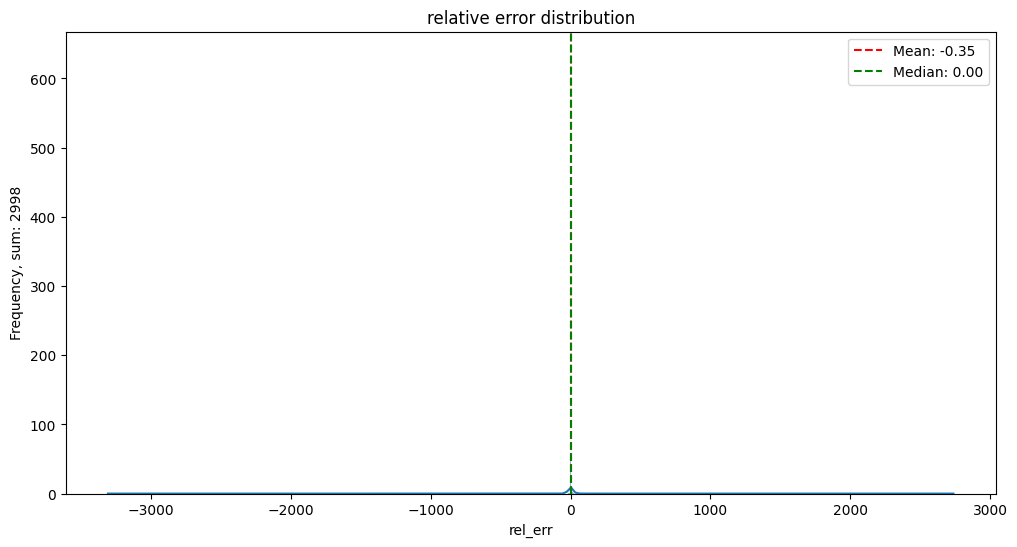

In [78]:
pd_tools.plot_hist_mm_lines(predictions['rel_err'], 'relative error')

In [ ]:
predictions = model.transform(test_data_transformed.select('features', 'x'))
predictions.show(5)

+--------------------+------------------+-------------------+
|            features|             label|         prediction|
+--------------------+------------------+-------------------+
|(12,[6,7,8,9,10,1...|-4305.652096671342| -4308.517536114145|
|(12,[6,7,8,9,10,1...| -4306.46547426193|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4306.779007063473|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4307.701138155361|-4308.5590955020125|
|(12,[6,7,8,9,10,1...|-4308.445435301533| -4309.996531935143|
+--------------------+------------------+-------------------+
only showing top 5 rows



In [75]:
# Calculate Mean Squared Error
evaluator_mse = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="rmse")
mse = evaluator_mse.evaluate(predictions)
evaluator_mae = RegressionEvaluator(predictionCol="prediction", labelCol="label", metricName="mae")
mae = evaluator_mae.evaluate(predictions)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")

Mean Squared Error (MSE): 8.845634249620122
Mean Absolute Error (MAE): 5.5194811030703095


In [33]:
test_data_transformed.show()

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|3066793076|              -132|-2.5444222994575325| -4305.652096671342|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...|
|3267384871|              -162| -2.382064004182096|  -4306.46547426193|         0|            0|        

In [27]:
train_data_transformed.show(5)

+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|  stamp_ns|acceleration_level|           steering|                  x|vehicle_id|vehicle_model|vehicle_model_modification|location_reference_point_id|front_tire|rear_tire|ride_year|ride_month|ride_day|            features|
+----------+------------------+-------------------+-------------------+----------+-------------+--------------------------+---------------------------+----------+---------+---------+----------+--------+--------------------+
|2987440736|              -114| -2.655139533023165| -4305.325027045072|         0|            0|                         0|                          0|         0|        0|     2022|         3|      14|(12,[6,7,8,9,10,1...|
|3027341070|              -123|-2.5981690804828066| -4305.489154772268|         0|            0|        

In [17]:
# train_data_transformed.select('features').show()
# .withColumnRenamed('train_target_x', train_target_x.select('x')).show(5)

train_target_x.select('x').show(5)


+-------------------+
|                  x|
+-------------------+
| -4305.325027045072|
| -4305.489154772268|
| -4305.815554919963|
| -4305.979063002069|
|-4306.1407354508965|
+-------------------+
only showing top 5 rows



In [18]:
control_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}', header=True, inferSchema=True)
localization_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}', header=True, inferSchema=True)
metadata_sp = spark_read_metadata(data_train_path, train_ids, 0, files_temp)

In [21]:
def find_min_max(control, localization):
    '''Find min and max timestamp in localization for each timestamp in control dataframe'''
    
    # Join control with localization to find the closest timestamps
    control_with_min_max = control.alias('control').join(
        localization.alias('localization'),
        on=F.col('localization.stamp_ns') >= F.col('control.stamp_ns'),
        how='left'
    ).withColumn(
        'loc_stamp_max',
        F.min('localization.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
    # ).join(
    #     localization.alias('localization_min'),
    #     on=F.col('localization_min.stamp_ns') < F.col('control.stamp_ns'),
    #     how='left'
    # ).withColumn(
    #     'loc_stamp_min',
    #     F.max('localization_min.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
    )

    return control_with_min_max.select('control.*', 'loc_stamp_min', 'loc_stamp_max')

In [22]:
find_min_max(control_sp, localization_sp).show()

AnalysisException: [UNRESOLVED_COLUMN.WITH_SUGGESTION] A column or function parameter with name `loc_stamp_min` cannot be resolved. Did you mean one of the following? [`loc_stamp_max`, `control`.`stamp_ns`, `localization`.`x`, `localization`.`y`, `localization`.`z`].;
'Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, 'loc_stamp_min, loc_stamp_max#1684L]
+- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449, loc_stamp_max#1684L]
   +- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449, loc_stamp_max#1684L, loc_stamp_max#1684L]
      +- Window [min(stamp_ns#1443L) windowspecdefinition(stamp_ns#1420L, specifiedwindowframe(RowFrame, unboundedpreceding$(), unboundedfollowing$())) AS loc_stamp_max#1684L], [stamp_ns#1420L]
         +- Project [stamp_ns#1420L, acceleration_level#1421, steering#1422, stamp_ns#1443L, x#1444, y#1445, z#1446, roll#1447, pitch#1448, yaw#1449]
            +- Join LeftOuter, (stamp_ns#1443L >= stamp_ns#1420L)
               :- SubqueryAlias control
               :  +- Relation [stamp_ns#1420L,acceleration_level#1421,steering#1422] csv
               +- SubqueryAlias localization
                  +- Relation [stamp_ns#1443L,x#1444,y#1445,z#1446,roll#1447,pitch#1448,yaw#1449] csv


In [16]:
def make_spark_df_model(control:SparkDataFrame, localization:SparkDataFrame, metadata:SparkDataFrame):

    
    def find_min_max(control, localization):
        '''Find min and max timestamp in localization for each timestamp in control dataframe'''
        
        # Join control with localization to find the closest timestamps
        control_with_min_max = control.alias('control').join(
            localization.alias('localization'),
            on=F.col('localization.stamp_ns') >= F.col('control.stamp_ns'),
            how='left'
        ).withColumn(
            'loc_stamp_max',
            F.min('localization.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
        ).join(
            localization.alias('localization_min'),
            on=F.col('localization_min.stamp_ns') < F.col('control.stamp_ns'),
            how='left'
        ).withColumn(
            'loc_stamp_min',
            F.max('localization_min.stamp_ns').over(Window.partitionBy('control.stamp_ns'))
        )

        return control_with_min_max.select('control.*', 'loc_stamp_min', 'loc_stamp_max')
    
    def merge_min_max(control_2m, localization):
        '''Merge min and max timestamp in localization for each timestamp in control dataframe'''
        
        control_3m = control_2m.join(
            localization.withColumnRenamed('stamp_ns', 'stamp_ns_max').alias('localization_max'),
            on=control_2m['loc_stamp_max'] == F.col('localization_max.stamp_ns_max'),
            how='left'
        ).join(
            localization.withColumnRenamed('stamp_ns', 'stamp_ns_min').alias('localization_min'),
            on=control_2m['loc_stamp_min'] == F.col('localization_min.stamp_ns_min'),
            how='left'
        )

        # Rename columns for clarity
        for col in ['x', 'y', 'z', 'roll', 'pitch', 'yaw']:
            control_3m = control_3m.withColumnRenamed(f'localization_max.{col}', f'{col}_max')
            control_3m = control_3m.withColumnRenamed(f'localization_min.{col}', f'{col}_min')

        return control_3m.drop('loc_stamp_max', 'loc_stamp_min')
    
    def interpolate_coords(control_3m, col_min, col_max):
        '''Interpolate values between max and min values'''
        
        interpolation_expr = (
            (F.col('stamp_ns') - F.col('stamp_ns_min')) / (F.col('stamp_ns_max') - F.col('stamp_ns_min')) *
            (F.col(col_max) - F.col(col_min)) + F.col(col_min)
        )
        
        return control_3m.withColumn(col_min.split('_')[0], interpolation_expr)

    control_2m = find_min_max(control, localization)
    control_3m = merge_min_max(control_2m, localization)

    # Interpolate each coordinate column
    coords_cols = ['x', 'y', 'z', 'roll', 'pitch', 'yaw']
    for col in coords_cols:
        control_3m = interpolate_coords(control_3m, f'{col}_min', f'{col}_max')
    
    contr_cols = ['stamp_ns', 'acceleration_level', 'steering']
    control_inter = control_3m.select(*contr_cols, *coords_cols)
    
    def tires_to_columns_date(metadata):
        '''Change tires column to front and rear columns and convert ride_date to datetime and add year, month, day columns'''
        
        # Add columns for front and rear tires
        metadata_with_tires = metadata.withColumn('front_tire', F.col('tires')[0]) \
                                      .withColumn('rear_tire', F.col('tires')[1]) \
                                      .drop('tires')
        
        # Convert ride_date to datetime and extract year, month, day
        metadata_with_tires = metadata_with_tires.withColumn('ride_date', F.to_date(F.col('ride_date'))) \
                                                 .withColumn('ride_year', F.year(F.col('ride_date'))) \
                                                 .withColumn('ride_month', F.month(F.col('ride_date'))) \
                                                 .withColumn('ride_day', F.dayofmonth(F.col('ride_date'))) \
                                                 .drop('ride_date')
        
        return metadata_with_tires

    def add_metadata(control, metadata):
        '''Add metadata to each row in control dataframe'''
        
        metadata_row = metadata.first()  # Assuming only one row for metadata
        for col in metadata.columns:
            control = control.withColumn(col, F.lit(metadata_row[col]))
        
        return control

    # Process metadata
    metadata_m = tires_to_columns_date(metadata)
    
    # Add metadata to each row in the control DataFrame
    control_model = add_metadata(control_inter, metadata_m)

    return control_model


In [34]:
control_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[0]}', header=True, inferSchema=True)
localization_sp = spark.read.csv(f'{data_train_path}/{train_ids[0]}/{files_temp[1]}', header=True, inferSchema=True)
metadata_sp = spark_read_metadata(data_train_path, train_ids, 0, files_temp)


In [126]:
files_temp

['control.csv', 'localization.csv', 'metadata.json']

In [ ]:
# read data in each file
def read_data_pandas(path: str, ids: pd.Series, files: list):
    '''Read data in each file'''
    for i in ids:
        data = []
        for file in files:
            if file == 'control.csv':
                data.append(pd.read_csv(f'{path}/{i}/{file}'))
            elif file.endswith('.json'):
                data.append(json.load(open(f'{path}/{i}/{file}')))
    return data

In [123]:
# read data in each file with spark
def read_data_spark(path: str, ids: pd.Series, files: list):
    '''Read data in each file with spark'''
    for i in ids:
        data = []
        for file in files:
            if file == 'control.csv':
                conrtol = spark.read.csv(f'{path}/{i}/{file}', header=True, inferSchema=True)
            elif file == 'localization.csv':
                localization = spark.read.csv(f'{path}/{i}/{file}', header=True, inferSchema=True)
            elif file == 'metadata.json':
                metadata = spark.read.json(f'{path}/{i}/{file}', multiLine=True, mode='PERMISSIVE'))
   
    
    return 